In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import desc

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
# the word "Keys" is a reference to the names of the table located by the automap.
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results (next 4 cells)
# 1. Get most recent date 
recent_date = Latest_date = Session.query(func.max(Measurement.date)).all()
end_date = recent_date[0][0]
print(end_date)

2017-08-23


In [34]:
#get prior year date
structure = dt.date.today()
end_date_date_format = structure.replace(year=int(end_date[:4]),month=int(end_date[5:7]),day=int(end_date[8:]))
prior_year_date = end_date_dateformat - dt.timedelta(days=365)    
beginning_date = prior_year_date.strftime("%Y-%m-%d")
print(beginning_date)

2016-08-23


In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data = Session.query(Measurement.date,Measurement.prcp)\
                          .filter(Measurement.date <= end_date)\
                          .filter(Measurement.date >= beginning_date)\
                          .order_by(Measurement.date.desc()).all()

In [64]:
#setup dataframe
precip_DF = pd.DataFrame(precip_data).rename(columns={"date":"Date","prcp":"Precipitation Score"})
precip_DF.set_index("Date",inplace=True)
precip_DF.head(10)

,Precipitation Score
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


TypeError: 'tuple' object is not callable

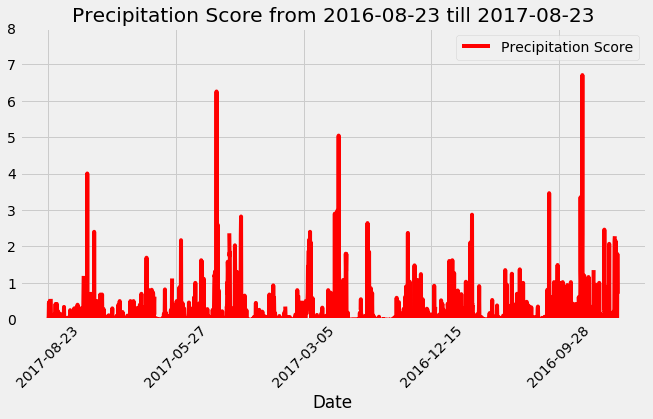

In [66]:
#Plot outcome from dataframe results 
precip_DF.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {beginning_date} till {end_date}',\
label="Precipitation",rot=45, color= "red")
plt.legend(loc="upper left")
plt.show()

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_DF.describe()


,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
Stations = Session.execute("SELECT count(*) FROM Station").fetchall()
print(Stations)


[(9,)]


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_Stations = Session.execute("SELECT station, count(station) AS 'active' FROM Measurement GROUP BY station ORDER BY 'active' desc;").fetchall()
# Active_Stations = Session.execute("SELECT station, count(station) AS 'Active' FROM Measurement GROUP BY station),orderby(desc(Measurement.Active).fetchall()
print(Active_Stations)


[('USC00519523', 2669), ('USC00519397', 2724), ('USC00519281', 2772), ('USC00518838', 511), ('USC00517948', 1372), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00513117', 2709), ('USC00511918', 1979)]


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = Session.execute("SELECT station, ROUND(min(tobs),0) FROM Measurement where station = 'USC00519281'").fetchall()
print(lowest_temp)

[('USC00519281', 54.0)]


In [15]:
high_temp = Session.execute("SELECT station, ROUND(max(tobs),0) FROM Measurement where station = 'USC00519281'").fetchall()
print(high_temp)

[('USC00519281', 85.0)]


In [16]:
avg_temp = Session.execute("SELECT station, ROUND(avg(tobs),0) FROM Measurement where station = 'USC00519281'").fetchall()
print(avg_temp)

[('USC00519281', 72.0)]


In [45]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# # 1. Get most recent date 
# recent_date = Latest_date = Session.query(func.max(Measurement.date)).all()
# end_date = recent_date[0][0]
# print(end_date)

highest_number_obsv = Session.query(Measurement.station,func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.station))).first()
print(highest_number_obsv)

('USC00519281', 2772)


In [49]:
# 12 months of temperature observation data and plot
tobs_12mths = Session.query(Measurement.date,Measurement.station,Measurement.tobs)\
.filter(Measurement.date >= beginning_date).filter(Measurement.date<=end_date)\
.filter(Measurement.station == highest_number_obsv[0]).order_by(desc(Measurement.date)).all()

In [52]:
prior_yr_tobs_DF = pd.DataFrame(tobs_12mths,columns = ["Date", "Station", "Temperature"])
prior_yr_tobs_DF.head(10)

,Date,Station,Temperature
0,2017-08-18,USC00519281,79.0
1,2017-08-17,USC00519281,76.0
2,2017-08-16,USC00519281,76.0
3,2017-08-15,USC00519281,77.0
4,2017-08-14,USC00519281,77.0
5,2017-08-13,USC00519281,77.0
6,2017-08-06,USC00519281,83.0
7,2017-08-05,USC00519281,82.0
8,2017-08-04,USC00519281,77.0
9,2017-07-31,USC00519281,76.0


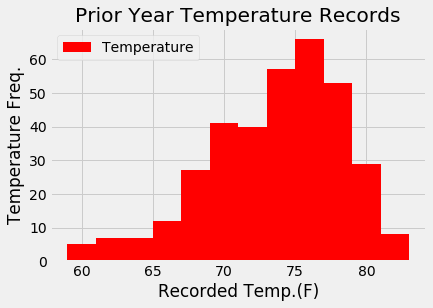

In [58]:
prior_yr_tobs_DF.plot.hist(by="Temperature_Recorded",bins=12,label="tobs",title= "Prior Year Temperature Records",color= "red")
plt.ylim=(0,80)
plt.ylabel("Temperature Freq.")
plt.xlabel("Recorded Temp.(F)")
plt.legend=()
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
